<a href="https://colab.research.google.com/github/chominyeong/PyTorch-DeepLearning-Start/blob/main/Ch06_%EC%9D%B8%EA%B3%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 06-02) 단층 퍼셉트론(Perceptron)
가중치, 편향을 조정해 구현

In [ ]:
def AND_gate(x1, x2):
  w1=0.5
  w2=0.5
  b=-0.7
  result = x1*w1 + x2*w2 + b
  if result <= 0:
    return 0
  else:
    return 1

In [ ]:
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

(0, 0, 0, 1)

In [ ]:
def NAND_gate(x1, x2):
    w1=-0.5
    w2=-0.5
    b=0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [ ]:
NAND_gate(0, 0), NAND_gate(0, 1), NAND_gate(1, 0), NAND_gate(1, 1)

(1, 1, 1, 0)

In [ ]:
def OR_gate(x1, x2):
    w1=0.6
    w2=0.6
    b=-0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [ ]:
OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)

(0, 1, 1, 1)

In [ ]:
# XOR 게이트는 직선이 아닌 곡선. 비선형 영역으로 분리하면 구현이 가능함

### 06-03) XOR 문제 - 단층 퍼셉트론 구현하기

1. 파이토치로 단층 퍼셉트론 구현하기

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed(777)

In [ ]:
# 입력과 출력을 미리 정의
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [ ]:
print(X)
print(Y)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
tensor([[0.],
        [1.],
        [1.],
        [0.]])


In [ ]:
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()  # 활성화 함수 - 시그모이드 사용
model = nn.Sequential(
    linear,
    sigmoid
)

In [ ]:
# 비용 함수 - 이진분류에 사용하는 크로스엔트로피 함수 nn.BCELoss()
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [ ]:
#10,001번의 에포크 수행. 0번 에포크부터 10,000번 에포크까지.
for step in range(10001):
  optimizer.zero_grad()
  hypothesis = model(X)

  # 비용 함수
  cost = criterion(hypothesis, Y)
  cost.backward()
  optimizer.step()

  if step % 100 == 0: # 100번째 에포크마다 비용 출력
    print(step, cost.item())

0 0.7666423320770264
100 0.6931473612785339
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

200번 에포크에 비용이 0.6931471824645996가 출력된 이후에는 더 이상 비용이 줄어들지 않는다.   
→ 단층 퍼셉트론은 XOR 문제를 풀 수 없다.

In [ ]:
with torch.no_grad():
  hypothesis = model(X)
  pred = (hypothesis > 0.5).float()
  accuracy = (pred==Y).float().mean()
  print('모델의 출력값(Hypothesis): \n', hypothesis.detach().cpu().numpy())
  print('모델의 예측값(Predicted): \n', pred.detach().cpu().numpy())
  print('실제값(Y): \n', Y.cpu().numpy())
  print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis): 
 [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted): 
 [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y): 
 [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


### 06-05) XOR 문제 - 다층 퍼셉트론 구현하기

In [ ]:
import torch
import torch.nn as nn

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed(777)

In [ ]:
# 입력과 출력 정의
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [ ]:
# 다층 퍼셉트론 설계
model = nn.Sequential(
    # 입력층
    nn.Linear(2, 10, bias=True),

    # 은닉층 1
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True),

    # 은닉층 2
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True),

    # 은닉층 3
    nn.Sigmoid(),
    nn.Linear(10, 1, bias=True),

    # 출력층
    nn.Sigmoid(),
).to(device)

In [ ]:
# 비용함수
criterion = torch.nn.BCELoss().to(device)
# 옵티마이저
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [ ]:
for epoch in range(10001):
  optimizer.zero_grad()

  hypothesis = model(X)

  cost = criterion(hypothesis, Y)
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(epoch, cost.item())

0 0.6948983073234558
100 0.693155825138092
200 0.6931535601615906
300 0.6931513547897339
400 0.6931493282318115
500 0.6931473016738892
600 0.6931453943252563
700 0.6931434869766235
800 0.6931416988372803
900 0.6931397914886475
1000 0.6931379437446594
1100 0.6931361556053162
1200 0.6931343078613281
1300 0.6931324005126953
1400 0.6931304931640625
1500 0.6931284666061401
1600 0.6931264400482178
1700 0.6931242942810059
1800 0.6931220293045044
1900 0.6931197047233582
2000 0.6931172609329224
2100 0.6931145191192627
2200 0.6931115984916687
2300 0.6931084990501404
2400 0.6931051015853882
2500 0.6931014657020569
2600 0.6930974721908569
2700 0.6930930018424988
2800 0.6930879950523376
2900 0.6930825114250183
3000 0.6930762529373169
3100 0.6930692195892334
3200 0.6930612325668335
3300 0.6930519938468933
3400 0.6930411458015442
3500 0.6930283904075623
3600 0.6930132508277893
3700 0.6929951906204224
3800 0.6929728984832764
3900 0.6929453015327454
4000 0.6929103136062622
4100 0.6928649544715881
4200 

In [ ]:
with torch.no_grad():
  hypothesis = model(X)
  pred = (hypothesis > 0.5).float()
  accuracy = (pred==Y).float().sum()

  print('모델의 출력값', hypothesis.detach().cpu().numpy())
  print('모델의 예측값', pred.detach().cpu().numpy())
  print('실제값', Y.cpu().numpy())
  print('정확도', accuracy.item())

모델의 출력값 [[1.1168801e-04]
 [9.9982882e-01]
 [9.9984229e-01]
 [1.8529482e-04]]
모델의 예측값 [[0.]
 [1.]
 [1.]
 [0.]]
실제값 [[0.]
 [1.]
 [1.]
 [0.]]
정확도 4.0


### 06-06) 비선형 활성화 함수(Activation function)
* 선형함수가 아닌 비선형함수(직석 1개로 그릴 수 없는 함수) 여야 하는 이유 : 선형함수로는 은닉층을 쌓을 수가 없음 -> XOR함수를 보면 됨 / 선형함수로 은닉층을 여러번 추가하더라고 1회 추가한 것과 차이가 없음 y(x) = f(f(f(x)))
* 우선 인공 신경망은 입력에 대해서 순전파(forward propagation) 연산을 하고, 그리고 순전파 연산을 통해 나온 예측값과 실제값의 오차를 손실 함수(loss function)을 통해 계산하고, 그리고 이 손실(loss)을 미분을 통해서 기울기(gradient)를 구하고, 이를 통해 역전파(back propagation)를 수행합니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

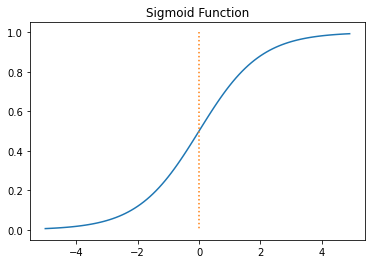

In [ ]:
plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

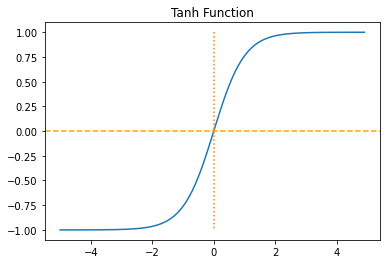

In [ ]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

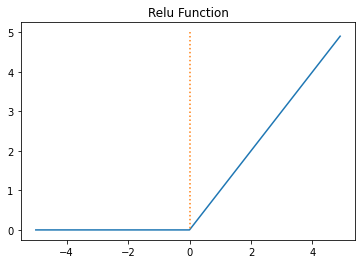

In [ ]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

In [ ]:
a = 0.1

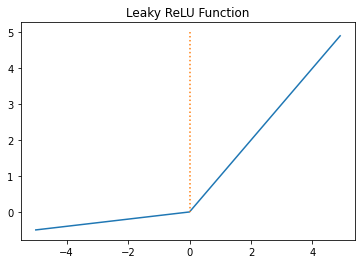

In [ ]:
def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

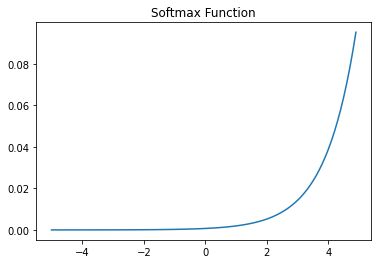

In [ ]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

### 06-07) 다층 퍼셉트론으로 손글씨 분류하기

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
print(digits.target[0])

0


In [ ]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


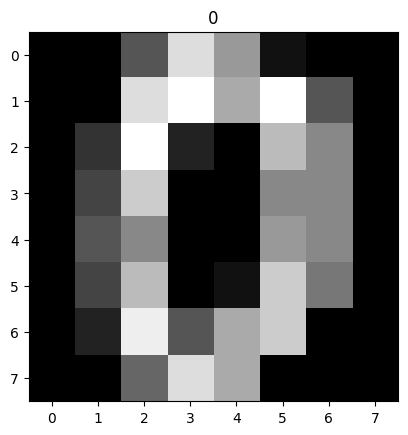

In [ ]:
plt.title(digits.target[0])
plt.imshow(digits.images[0], 'gray')

In [ ]:
print("전체 샘플의 수 : {}".format(len(digits.images)))

전체 샘플의 수 : 1797


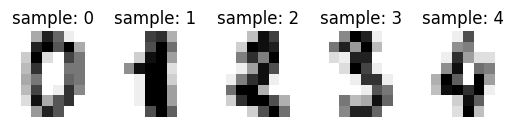

In [ ]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [ ]:
for i in range(5):
  print(i,'번 인덱스 샘플의 레이블 : ',digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


In [ ]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [ ]:
X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블

In [ ]:
import torch
import torch.nn as nn
from torch import optim

In [ ]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [ ]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [ ]:
lossses=[]

In [ ]:
for epoch in range(100):
  optimizer.zero_grad()
  y_pred = model(X)
  loss = loss_fn(y_pred, Y)
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print("Epoch {}/{} Loss: {}".format(
        epoch, 100, loss.item()
    ))
  lossses.append(loss.item())

Epoch 0/100 Loss: 2.333454132080078
Epoch 10/100 Loss: 1.9745115041732788
Epoch 20/100 Loss: 1.6280492544174194
Epoch 30/100 Loss: 1.2589832544326782
Epoch 40/100 Loss: 0.8921793103218079
Epoch 50/100 Loss: 0.6021357178688049
Epoch 60/100 Loss: 0.41308706998825073
Epoch 70/100 Loss: 0.2985505759716034
Epoch 80/100 Loss: 0.22849196195602417
Epoch 90/100 Loss: 0.18330086767673492


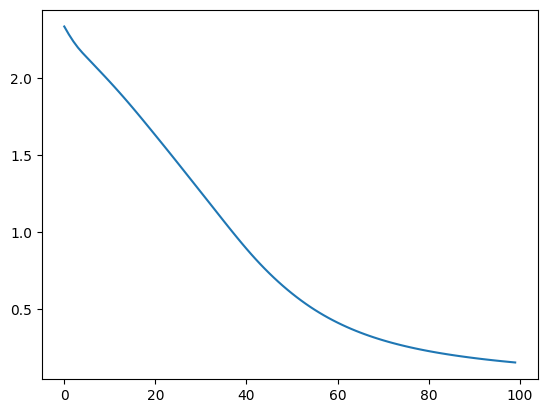

In [ ]:
plt.plot(lossses)

### 06-08) 다층 퍼셉트론으로 MNIST 분류하기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [ ]:
mnist.data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
mnist.target[0]

'5'

In [ ]:
mnist.target = mnist.target.astype(np.int8)

In [ ]:
X = mnist.data / 255 # 0-255값을 [0,1]로 정규화
Y = mnist.target

In [ ]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
Y[0]

5

In [ ]:
X[0].shape

(784,)

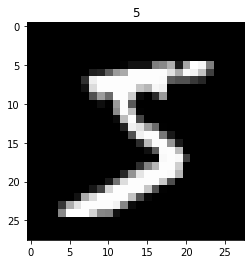

In [ ]:
plt.title(Y[0])
plt.imshow(X[0].reshape(28, 28), 'gray')

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/7, random_state=0)


In [ ]:
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

In [ ]:
loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [ ]:
import torch.nn as nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [ ]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
def train(epoch):

  model.train()

  for data, target in loader_train:

    optimizer.zero_grad()
    outputs = model(data)
    loss = loss_fn(outputs, target)
    loss.backward()
    optimizer.step()

  print("epoch{}：완료\n".format(epoch))

In [ ]:
def test():
    model.eval()  # 신경망을 추론 모드로 전환
    correct = 0

    # 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
    with torch.no_grad():  # 추론 과정에는 미분이 필요없음
        for data, targets in loader_test:

            outputs = model(data)  # 데이터를 입력하고 출력을 계산

            # 추론 계산
            _, predicted = torch.max(outputs.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산
            correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 경우 정답 카운트를 증가

    # 정확도 출력
    data_num = len(loader_test.dataset)  # 데이터 총 건수
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(
        correct,
        data_num,
        100. * correct / data_num))

In [ ]:
test()


테스트 데이터에서 예측 정확도: 972/10000 (10%)



In [ ]:
for epoch in range(3):
    train(epoch)

test()

epoch0：완료

epoch1：완료

epoch2：완료


테스트 데이터에서 예측 정확도: 9563/10000 (96%)



tensor([ -9.6818,  -6.4867,  15.7449,   4.6669, -15.9417, -13.4992, -19.2593,
          1.8428,  -3.9192, -12.2255], grad_fn=<AddBackward0>)
tensor(15.7449) tensor(2)
예측 결과 : 2
이 이미지 데이터의 정답 레이블은 2입니다


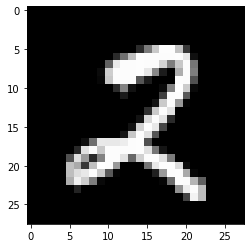

In [ ]:
index = 2018

model.eval()  # 신경망을 추론 모드로 전환
data = X_test[index]
output = model(data)  # 데이터를 입력하고 출력을 계산

_, predicted = torch.max(output.data, 0)  # 확률이 가장 높은 레이블이 무엇인지 계산
print(output)
print(_, predicted)
print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))

### 9) 과적합(Overfitting)을 막는 방법들
*
L1 규제 : 가중치 w들의 절대값 합계를 비용 함수에 추가합니다. L1 노름이라고도 합니다.
L2 규제 : 모든 가중치 w들의 제곱합을 비용 함수에 추가합니다. L2 노름이라고도 합니다.

In [ ]:
class Architecture1(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Architecture1, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

In [ ]:
model = Architecture1(10, 20, 2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
# weight_decay 매개변수를 설정하므로서 L2 규제를 적용함